In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np                 
import requests
import time
from scipy.stats import linregress

In [2]:
#import CSV files
avg_rental_price = pd.read_csv('Resources/medianAskingRent_All.csv')

total_inventory = pd.read_csv('Resources/rentalInventory_All.csv')


national_rent = pd.read_csv('Resources/price.csv')

#removes columns unneccesary for data frame
national_rent = national_rent.loc[:, national_rent.columns[6:]]

national_rent.head()

,November 2010,December 2010,January 2011,February 2011,March 2011,April 2011,May 2011,June 2011,July 2011,August 2011,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2334,2339,2345,2344,2336,2324,2318,2321,2321,2322
1,2184.0,2184.0,2183.0,2188.0,2189.0,2189.0,2188.0,2191.0,2189.0,2186.0,...,2637,2662,2687,2704,2716,2723,2731,2740,2748,2753
2,1563.0,1555.0,1547.0,1537.0,1526.0,1517.0,1507.0,1497.0,1493.0,1491.0,...,1684,1686,1687,1685,1681,1675,1668,1656,1644,1632
3,1198.0,1199.0,1199.0,1200.0,1203.0,1205.0,1204.0,1199.0,1194.0,1190.0,...,1444,1446,1446,1443,1440,1438,1437,1437,1435,1430
4,1092.0,1099.0,1094.0,1087.0,1080.0,1080.0,1083.0,1082.0,1082.0,1085.0,...,1206,1211,1218,1222,1223,1220,1216,1211,1209,1212


In [3]:
# obtain averages for every row of the index and create a single column dataframe
column_averages = national_rent.mean()
national_avg = pd.DataFrame(column_averages)
national_avg = national_avg.drop(national_avg.index[:2])
national_avg.head()

,0
January 2011,1334.447744
February 2011,1331.935217
March 2011,1327.595819
April 2011,1323.824518
May 2011,1321.730822


In [52]:
#set the index according to year
national_avg.reset_index(drop=True, inplace=True)

national_rent = national_avg.groupby(national_avg.index // 12).mean()

years = [2011,2012, 2013, 2014, 2015, 2016, 2017]

national_rent.index= years 
national_rent = national_rent.round(2)
national_rent = national_rent.bfill()

national_rent

,0
2011,1323.71
2012,1327.37
2013,1346.56
2014,1372.89
2015,1434.69
2016,1465.22
2017,1467.30


In [5]:
avg_rental_price.head()

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03
0,All Downtown,Manhattan,submarket,3200.0,3200.0,3020.0,3100.0,3100.0,3200.0,3195.0,...,4950.0,4897.0,4810.0,4850.0,4700.0,4712.0,4780.0,4814.0,4850.0,4895.0
1,All Midtown,Manhattan,submarket,2875.0,2800.0,2800.0,2850.0,2895.0,2950.0,3000.0,...,4500.0,4495.0,4495.0,4475.0,4350.0,4300.0,4335.0,4449.0,4435.0,4437.0
2,All Upper East Side,Manhattan,submarket,2450.0,2450.0,2400.0,2500.0,2550.0,2550.0,2595.0,...,4000.0,4000.0,3995.0,4000.0,3995.0,4000.0,3950.0,3950.0,3995.0,3950.0
3,All Upper Manhattan,Manhattan,submarket,1825.0,1800.0,1795.0,1800.0,1823.0,1850.0,1875.0,...,2950.0,2900.0,2900.0,2850.0,2800.0,2800.0,2798.0,2800.0,2900.0,2895.0
4,All Upper West Side,Manhattan,submarket,2895.0,2800.0,2750.0,2800.0,2800.0,2795.0,2800.0,...,4402.0,4500.0,4500.0,4500.0,4450.0,4381.0,4250.0,4297.0,4300.0,4425.0


In [54]:
#Index by borough
new_df = avg_rental_price.set_index("areaType").drop(columns=['areaName'])
rent_price_borough = new_df.loc['borough'].set_index('Borough')
rent_price_df = rent_price_borough.T

rent_price_df.reset_index(drop=True, inplace=True)

yearly_rent = rent_price_df.groupby(rent_price_df.index // 12).mean()
yearly_rent = yearly_rent.iloc[:-4]

#create an array of years in order to set as index
years = [2010,2011,2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

yearly_rent.index= years 
yearly_rent = yearly_rent.round(2)
yearly_rent = yearly_rent.bfill()

print(yearly_rent)

Borough    Bronx  Brooklyn  Manhattan   Queens  Staten Island
2010     1562.08   2237.08    2867.75  1599.00        1562.86
2011     1492.83   2276.33    3098.92  1730.42        1562.86
2012     1485.33   2539.58    3189.17  2270.25        1562.86
2013     1497.92   2562.50    3214.75  2116.67        1618.83
2014     1533.25   2543.75    3217.25  2138.33        1657.92
2015     1534.92   2556.50    3313.33  2170.25        1690.08
2016     1652.50   2594.08    3328.58  2263.83        1988.75
2017     1736.08   2525.25    3265.17  2216.42        1924.25
2018     1868.33   2550.92    3262.50  2205.83        1885.75
2019     1920.42   2610.42    3435.75  2262.42        2017.75
2020     1974.33   2590.00    3157.58  2249.25        1945.42


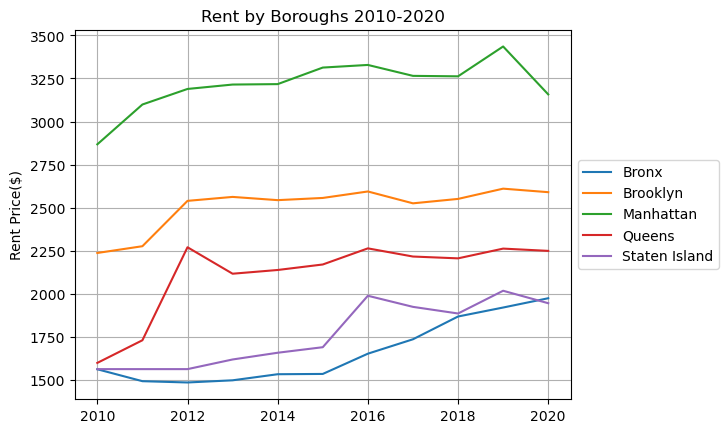

In [7]:
#Plot a line chart that shows the price of rent for each borough through the range of years
yearly_rent.plot(kind='line')
plt.grid(True)
plt.ylabel("Rent Price($)")
plt.title("Rent by Boroughs 2010-2020")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


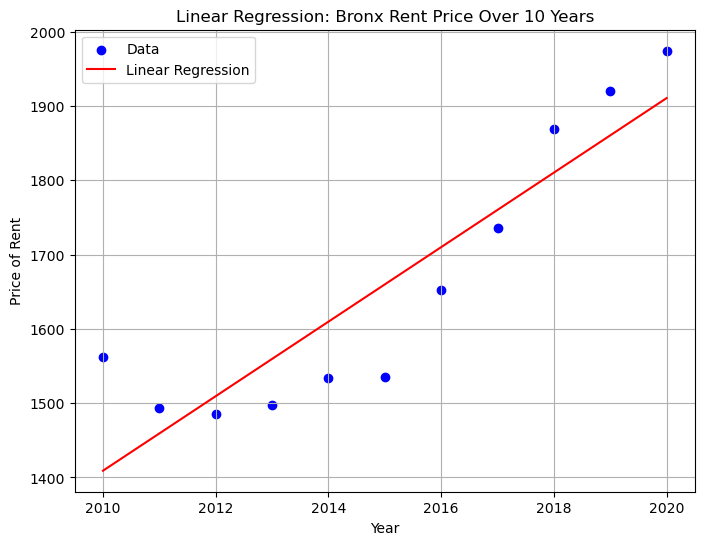

Slope: 50.14709090908846, Intercept: -99386.57090908599


In [70]:
# set x and y values
y_values = yearly_rent.index.values
x_values = yearly_rent['Bronx'].values
# Perform linear regression
slope, intercept = np.polyfit(y_values, x_values, 1)
# Create the regression line
regression_line = slope * y_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot the data and regression line
plt.figure(figsize=(8, 6))
plt.scatter(y_values, x_values, color='blue', label='Data')
plt.plot(years, regression_line, color='red', label='Linear Regression')
plt.xlabel('Year')
plt.ylabel('Price of Rent')
plt.title('Linear Regression: Bronx Rent Price Over 10 Years')
plt.legend()
plt.grid(True)
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.show()
# Print the slope and intercept
print(f'Slope: {slope}, Intercept: {intercept}')

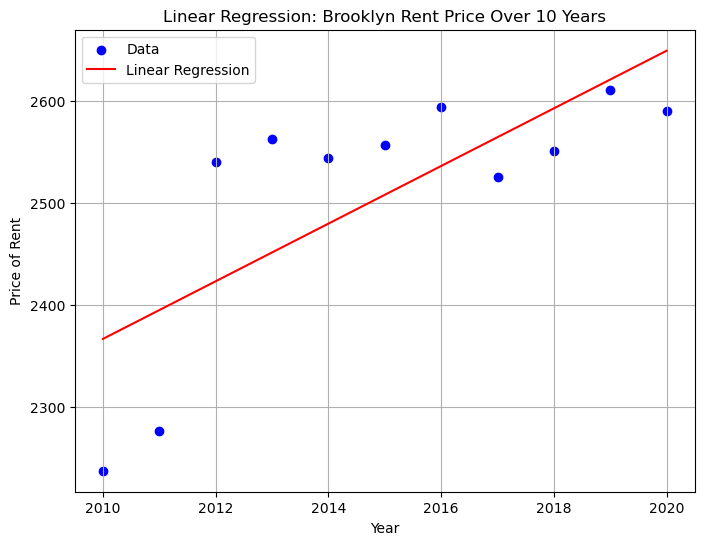

Slope: 28.28009090909108, Intercept: -54476.527727273075


In [55]:
# Sample data (replace with your actual data)
y_values = yearly_rent.index.values
x_values = yearly_rent['Brooklyn'].values
# Perform linear regression
slope, intercept = np.polyfit(y_values, x_values, 1)
# Create the regression line
regression_line = slope * y_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot the data and regression line
plt.figure(figsize=(8, 6))
plt.scatter(y_values, x_values, color='blue', label='Data')
plt.plot(years, regression_line, color='red', label='Linear Regression')
plt.xlabel('Year')
plt.ylabel('Price of Rent')
plt.title('Linear Regression: Brooklyn Rent Price Over 10 Years')
plt.legend()
plt.grid(True)
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.show()
# Print the slope and intercept
print(f'Slope: {slope}, Intercept: {intercept}')

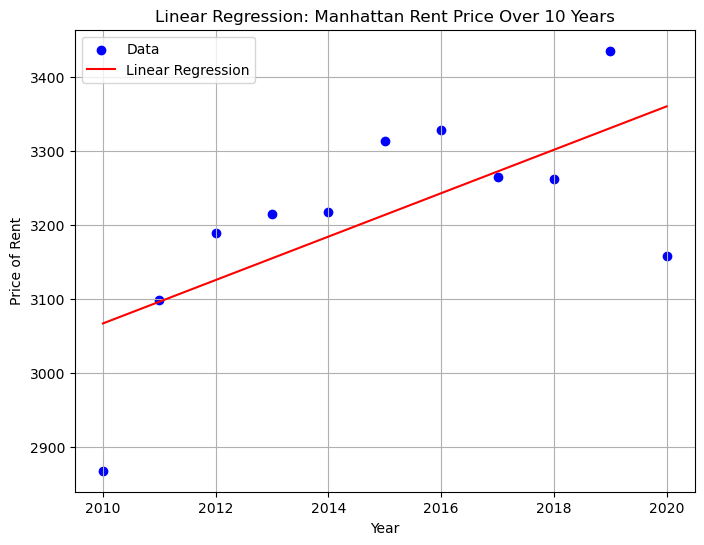

Slope: 29.351181818182198, Intercept: -55928.926818182576


In [57]:
# Sample data (replace with your actual data)
y_values = yearly_rent.index.values
x_values = yearly_rent['Manhattan'].values
# Perform linear regression
slope, intercept = np.polyfit(y_values, x_values, 1)
# Create the regression line
regression_line = slope * y_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot the data and regression line
plt.figure(figsize=(8, 6))
plt.scatter(y_values, x_values, color='blue', label='Data')
plt.plot(years, regression_line, color='red', label='Linear Regression')
plt.xlabel('Year')
plt.ylabel('Price of Rent')
plt.title('Linear Regression: Manhattan Rent Price Over 10 Years')
plt.legend()
plt.grid(True)
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.show()
# Print the slope and intercept
print(f'Slope: {slope}, Intercept: {intercept}')

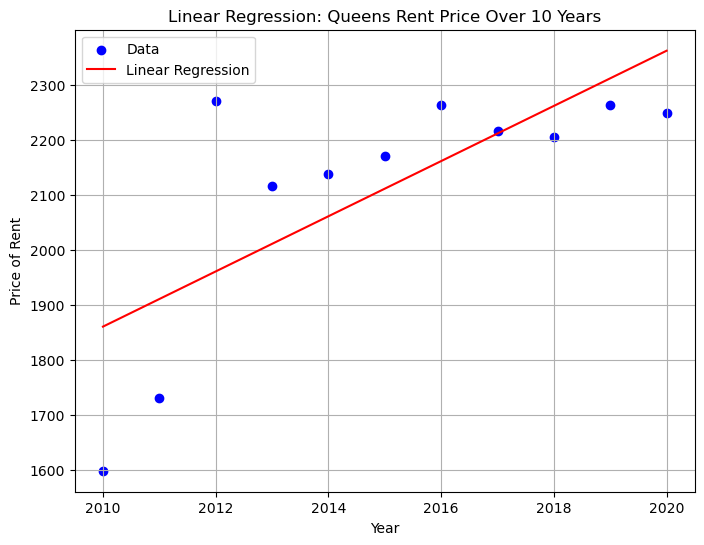

Slope: 50.0999090909096, Intercept: -98840.16500000103


In [58]:
# Sample data (replace with your actual data)
y_values = yearly_rent.index.values
x_values = yearly_rent['Queens'].values
# Perform linear regression
slope, intercept = np.polyfit(y_values, x_values, 1)
# Create the regression line
regression_line = slope * y_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot the data and regression line
plt.figure(figsize=(8, 6))
plt.scatter(y_values, x_values, color='blue', label='Data')
plt.plot(years, regression_line, color='red', label='Linear Regression')
plt.xlabel('Year')
plt.ylabel('Price of Rent')
plt.title('Linear Regression: Queens Rent Price Over 10 Years')
plt.legend()
plt.grid(True)
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.show()
# Print the slope and intercept
print(f'Slope: {slope}, Intercept: {intercept}')

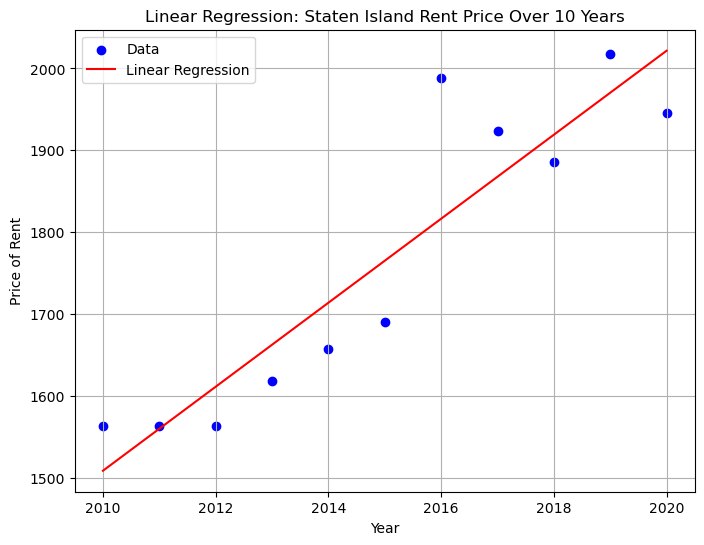

Slope: 51.297272727270325, Intercept: -101598.79272726791


In [59]:
# Sample data (replace with your actual data)
y_values = yearly_rent.index.values
x_values = yearly_rent['Staten Island'].values
# Perform linear regression
slope, intercept = np.polyfit(y_values, x_values, 1)
# Create the regression line
regression_line = slope * y_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot the data and regression line
plt.figure(figsize=(8, 6))
plt.scatter(y_values, x_values, color='blue', label='Data')
plt.plot(years, regression_line, color='red', label='Linear Regression')
plt.xlabel('Year')
plt.ylabel('Price of Rent')
plt.title('Linear Regression: Staten Island Rent Price Over 10 Years')
plt.legend()
plt.grid(True)
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.show()
# Print the slope and intercept
print(f'Slope: {slope}, Intercept: {intercept}')

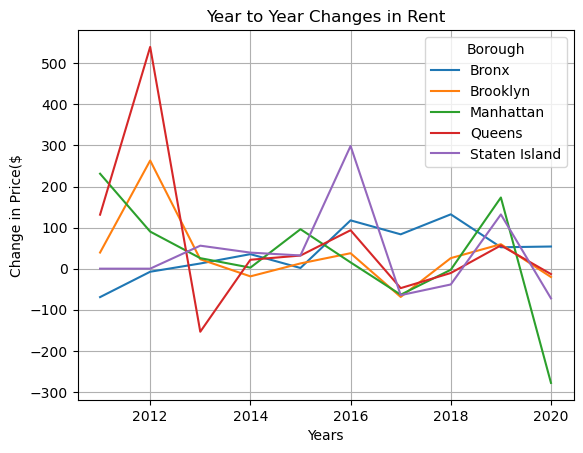

In [50]:
#plot the difference from year to year for each borough
yearly_change = yearly_rent.diff()

yearly_change.plot()
plt.title('Year to Year Changes in Rent')
plt.xlabel('Years')
plt.ylabel('Change in Price($')
plt.grid(True)
plt.show()

In [69]:
#empty dictionary to store percent change
percent_changes = {}

#itereate through each column
for column in yearly_rent.columns:
    #select first and last row of each column
    first_row = yearly_rent[column].iloc[0]
    last_row = yearly_rent[column].iloc[-1]
    
    #calculate the percent change between 2010 and 2020
    percent_change = ((last_row - first_row) / first_row) * 100
    

    #store percent change in the dictionary
    percent_changes[column] = percent_change

#create a new data frame
percent_changes_df = pd.DataFrame(percent_changes.items(), columns=['Borough', 'Percent Change 2010-2020'])
percent_changes_df['Percent Change 2010-2020'] = percent_changes_df['Percent Change 2010-2020'].map("{:.2f}%".format)

percent_changes_df

,Borough,Percent Change 2010-2020
0,Bronx,26.39%
1,Brooklyn,15.78%
2,Manhattan,10.11%
3,Queens,40.67%
4,Staten Island,24.48%
